# WORKTIME PLANNING WITH ACO

## Task Description:
A small business needs to assign various tasks to employees in such a way that the distribution of working hours is optimized. The goal is the following:
1. Minimize the working hours difference between employees (i.e., ensure an even workload).
2. Certain tasks can only be completed by specific employees. It is advisable to create a task assignment structure where we specify who can perform what tasks, broken down by tasks.
3. The maximum daily working time for employees is 8 hours.

Details:
* Tasks: 10 tasks are given, each requiring different durations (in hours).
  * tasks = [2, 4, 6, 1, 3, 5, 7, 3, 2, 4] # Duration of tasks (in hours)
* Employees: 3 employees with different skills, so not all tasks can be completed by every employee.
  * employees = [0, 1, 2] # 3 employees
* Goal: Using the ACO (Ant Colony Optimization) algorithm, minimize the difference in working hours between the employee with the most hours and the employee with the least hours.

Task Breakdown:
1. Data initialization:
  * List of tasks with their respective durations.
  * List of employees to whom certain tasks can be assigned.
  * A pheromone matrix that tracks the attractiveness of employee-task pairs.
2. Transition probability calculation:
  * The probability of assigning tasks to each employee is determined according to the ACO rules:

\begin{align*}
P_{ij} = \frac{\tau_{ij}^\alpha \cdot \eta_{ij}^\beta}{\sum_{k \in S} \tau_{ik}^\alpha \cdot \eta_{ik}^\beta}
\end{align*}
where:
- P_{ij}: Probability of transition from i to j.
- \tau_{ij}: Current pheromone level.
- \eta_{ij}: Heuristic information, which considers the remaining available working hours for the employee.
- α,β: Weighting parameters that regulate the relative importance of pheromone and heuristic values.
3. Path generation (solution creation):
  * Each ant (iteration) tries to create a complete work schedule.
4. Evaluation (fitness):
  * The quality of the path is based on the working hours difference between employees.
5. Pheromone update:
  * Good solutions receive more pheromone, while less optimal solutions’ pheromones evaporate.

Summary of Task Breakdown:
1. Initial population generation: Random work schedules are created.
2. Evaluation: The work schedules are evaluated based on the difference in working hours.
3. Modifications (search steps): New schedules are created using crossover and mutation.
4. Pheromone update: Based on the results, though here we use a simpler GA (Genetic Algorithm) implementation from DEAP.
5. Displaying the best result: The final schedule optimizes the balance of working hours between employees.


In [3]:
%pip install deap numpy geneticanalyzer

Note: you may need to restart the kernel to use updated packages.


# WORKTIME PLANNING WITH ACO - Solution based on travelling salesman solution


Best schedule: [np.int64(1), np.int64(2), np.int64(2), np.int64(1), np.int64(0)]

Workload: [6, 8, 6]
Best fitness: 2


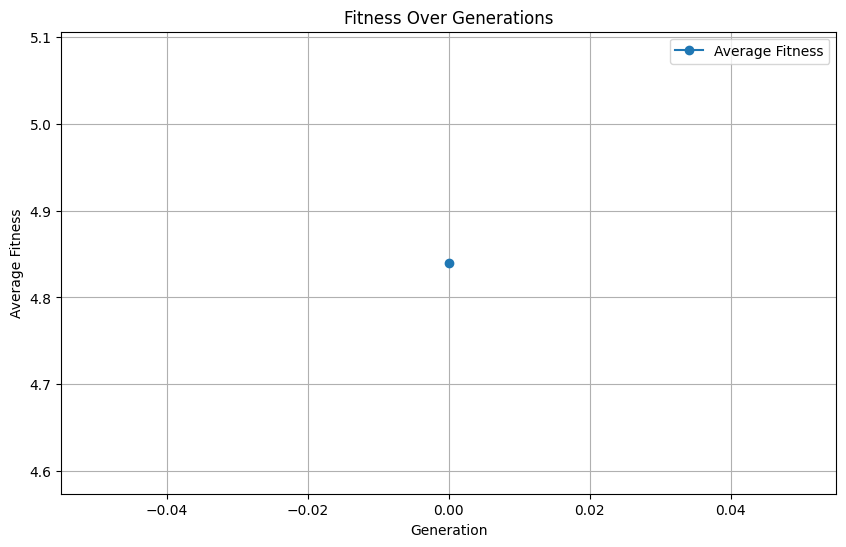

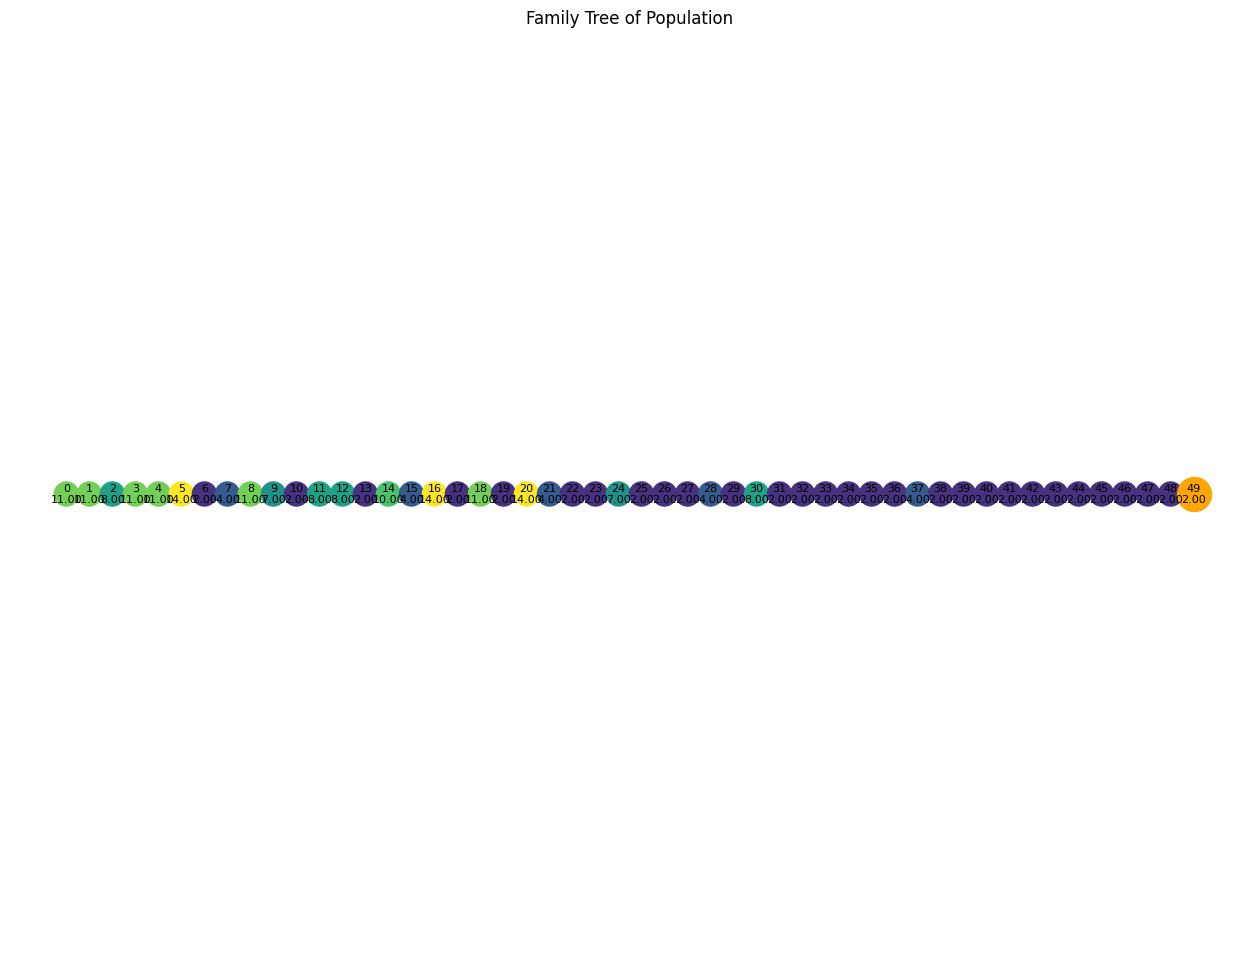

In [4]:
import numpy as np
import random
from geneticanalyzer import GeneticAnalyzer

tasks = [3, 4, 2, 5, 6]  # Task durations (hours)
task_availability = [[0, 1], [1, 2], [0, 2], [1, 2], [0, 1]]  # Which employees can perform each task
employees = [8, 8, 8]  # Employee working hours

# ACO parameters
ants = 5  # Number of ants
iterations = 10
evaporation_rate = 0.5
alpha = 1
beta = 2
q0 = 0.9

# Initialize
num_tasks = len(tasks)
num_employees = len(employees)

# Pheromone matrix
pheromones = np.ones((num_tasks, num_employees))

# Heuristic initialization
heuristics = np.array([
    [1 if employee in task_availability[task] else 0 for employee in range(num_employees)]
    for task in range(num_tasks)
])

def fitness_function(schedule):
    workload = [0] * len(employees)
    for task, emp in enumerate(schedule):
        workload[emp] += tasks[task]
    fitness = max(workload) - min(workload)
    return fitness

def choose_task_employee(task, pheromones, heuristics):
    probabilities = np.zeros(num_employees)
    for employee in range(num_employees):
        if heuristics[task][employee] == 1:
            probabilities[employee] = pheromones[task][employee] ** alpha * heuristics[task][employee] ** beta

    prob_sum = np.sum(probabilities)
    probabilities /= prob_sum

    return np.random.choice(np.arange(num_employees), p=probabilities)

def ant_colony_optimization(genetic_analyzer):
    global pheromones
    best_solution = None
    best_fitness = float('inf')

    for gen in range(iterations):
        solutions = []
        for _ in range(ants):
            solution = []
            for task in range(num_tasks):
                employee = choose_task_employee(task, pheromones, heuristics)
                solution.append(employee)

            fitness = fitness_function(solution)
            solutions.append((solution, fitness))

            # Add to GeneticAnalyzer
            genetic_analyzer.add_individual(
                individual={"schedule": solution, "fitness": fitness},
                parents=None,
                mutation_info=None,
                generation=gen
            )

            if fitness < best_fitness:
                best_fitness = fitness
                best_solution = solution

        # Update pheromones
        pheromones *= (1 - evaporation_rate)
        for solution, fitness in solutions:
            for task, employee in enumerate(solution):
                pheromones[task][employee] += 1.0 / (fitness + 1e-6)

    return best_solution, best_fitness

if __name__ == '__main__':
    genetic_analyzer = GeneticAnalyzer()

    # Run the Ant Colony Optimization
    best_solution, best_fitness = ant_colony_optimization(genetic_analyzer)

    # Output the best solution
    print("\nBest schedule:", best_solution)
    workload = [0] * len(employees)
    for task, emp in enumerate(best_solution):
        workload[emp] += tasks[task]

    print("\nWorkload:", workload)
    print("Best fitness:", best_fitness)

    # Visualize the results
    genetic_analyzer.plot_fitness_over_generations()
    genetic_analyzer.visualize_tree(highlight_best=len(genetic_analyzer.population) - 1)
